# Customer analysis and segmentation - Swiss largest online grocery retailer

## 1) Data exploration
- Task: Analyze the data, show us what you would do to understand it and explain us how to interpret results. You are free to use any tools you like.

The data is made by a customer dataset which includes infos on customer demographic characteristics, behaviour, purchases, loyalty, and number of total transactions.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load data_sample file
df_t = pd.read_excel('data_sample.xlsx')
print('Dataframe shape: ', df_t.shape, '\n')
df_t.head()

Dataframe shape:  (100, 14) 



,transactions,loyalty,days_since_last_contact,gender,person_id,product_ids,0ne.hot.1,0ne.hot.2,0ne.hot.3,0ne.hot.4,promotion_set_id,platform,delivery_pass,is_newsletter
0,4,-1.33,2,m,170636bb-3601-4a18-b572-52650c0d2d0e,"[7881,10834,61603,62040,63288,125830]",1,0,0,0,042e2ace-0a6b-4983-811a-aa8c1aa3166a,web,True,True
1,6,-0.28,3,m,2a4c9697-b937-4429-9fd3-5529929a1ab9,"[10834,61603,62040,63288,125830]",1,0,0,0,745da0a4-b45f-4e40-b63f-fb5034927dd1,web,True,True
2,5,-0.22,1,w,4d12441d-3748-4b05-81bf-fd24f9f9d6f4,"[63288,125830]",1,0,0,0,cabe25fc-1fbb-43cf-b95c-f8a451630a61,web,False,True
3,7,-0.29,0,m,00f173be-96b1-4407-809c-6882e5bbb1fd,"[7881,10834]",0,1,0,0,5ffbd84f-f05e-4010-ac08-f29819c18d3f,web,True,True
4,4,1.06,5,m,f5aa1643-398f-4027-ab75-7b72ebe92d90,"[7881,10834,62040,63288,125830]",0,0,1,0,9fa195e5-8526-400d-9503-cf35f7abcd4c,web,True,True


### Data preparation and creation of new features
Convert boolean variables in dummies, obtain dummy variables for each product, create new features based on available product info.

In [3]:
# Convert booleans variables in integers
df_t['delivery_pass'] = df_t['delivery_pass'].astype(int)

# Get dummies for gender and products_ids
df_t['woman'] = pd.get_dummies(df_t['gender'], drop_first=True)
df_t['mango'] = np.where(df_t['product_ids'].str.contains('7881'), 1, 0)
df_t['ovom'] = np.where(df_t['product_ids'].str.contains('10834'), 1, 0)
df_t['nutella'] = np.where(df_t['product_ids'].str.contains('61603'), 1, 0)
df_t['pears'] = np.where(df_t['product_ids'].str.contains('63288'), 1, 0)
df_t['carots'] = np.where(df_t['product_ids'].str.contains('125830'), 1, 0)
df_t['chips'] = np.where(df_t['product_ids'].str.contains('62040'), 1, 0)

## Create additional features based on products info (N.B., features like "buy at least one fruits" and "buy at least one vegetable" are constants and/or equivalent to previous dummies)

# 1) Number of different items purchased
df_t['items'] = df_t[['mango', 'ovom', 'nutella', 'pears', 'carots', 'chips']].sum(axis=1)

# 2) Purchase at least one sweet
df_t['sweets'] = np.where((df_t['ovom'] == 1) | (df_t['nutella'] == 1), 1, 0)

# 3) Purchase only seasonal products
df_t['buy_only_seas'] = np.where(((df_t['mango'] == 1) |  (df_t['pears'] == 1))
                                    & (~((df_t['ovom'] == 1)| (df_t['nutella'] == 1)| (df_t['chips'] == 1))), 1, 0)

# 4) Purchase only fruits/vegetables
df_t['buy_only_healthy'] = np.where(((df_t['mango'] == 1) |  (df_t['pears'] == 1)| (df_t['carots'] == 1))
                                    & (~((df_t['ovom'] == 1)| (df_t['nutella'] == 1)| (df_t['chips'] == 1))), 1, 0)  

df_t.head()

,transactions,loyalty,days_since_last_contact,gender,person_id,product_ids,0ne.hot.1,0ne.hot.2,0ne.hot.3,0ne.hot.4,...,mango,ovom,nutella,pears,carots,chips,items,sweets,buy_only_seas,buy_only_healthy
0,4,-1.33,2,m,170636bb-3601-4a18-b572-52650c0d2d0e,"[7881,10834,61603,62040,63288,125830]",1,0,0,0,...,1,1,1,1,1,1,6,1,0,0
1,6,-0.28,3,m,2a4c9697-b937-4429-9fd3-5529929a1ab9,"[10834,61603,62040,63288,125830]",1,0,0,0,...,0,1,1,1,1,1,5,1,0,0
2,5,-0.22,1,w,4d12441d-3748-4b05-81bf-fd24f9f9d6f4,"[63288,125830]",1,0,0,0,...,0,0,0,1,1,0,2,0,1,1
3,7,-0.29,0,m,00f173be-96b1-4407-809c-6882e5bbb1fd,"[7881,10834]",0,1,0,0,...,1,1,0,0,0,0,2,1,0,0
4,4,1.06,5,m,f5aa1643-398f-4027-ab75-7b72ebe92d90,"[7881,10834,62040,63288,125830]",0,0,1,0,...,1,1,0,1,1,1,5,1,0,0


In [4]:
# Select numeric variables
numeric = list(df_t.select_dtypes([np.number]).columns)
print('Number of numeric variables: ', len(numeric))
df_t.describe()

Number of numeric variables:  19


,transactions,loyalty,days_since_last_contact,0ne.hot.1,0ne.hot.2,0ne.hot.3,0ne.hot.4,delivery_pass,woman,mango,ovom,nutella,pears,carots,chips,items,sweets,buy_only_seas,buy_only_healthy
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,6.550000,-0.000090,6.280000,0.300000,0.220000,0.160000,0.320000,0.520000,0.490000,0.640000,0.820000,0.530000,0.670000,0.670000,0.490000,3.820000,0.820000,0.180000,0.180000
std,2.709411,1.002703,3.861438,0.460566,0.416333,0.368453,0.468826,0.502117,0.502418,0.482418,0.386123,0.501614,0.472582,0.472582,0.502418,1.597852,0.386123,0.386123,0.386123
min,1.000000,-1.710000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,5.000000,-0.742500,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000
50%,7.000000,-0.100500,5.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,1.000000,0.000000,0.000000
75%,8.250000,1.032500,9.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,0.000000,0.000000
max,15.000000,1.400000,14.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000


### Explore transactions, loyalty and purchase frequency distributions
- On average, female customers tend to purchase more frequently than men, they are more loyal and the recency of their purchases is lower.
- On average, customers that buy few items are more occasional buyers and the recency of their purchases is lower compare to other customers.
- There is a 0.95 correlation betweeen the number of items purchased and the likelyhood of buying chips.
- There is a 0.69 correlation between buying chips and pears/carotts.

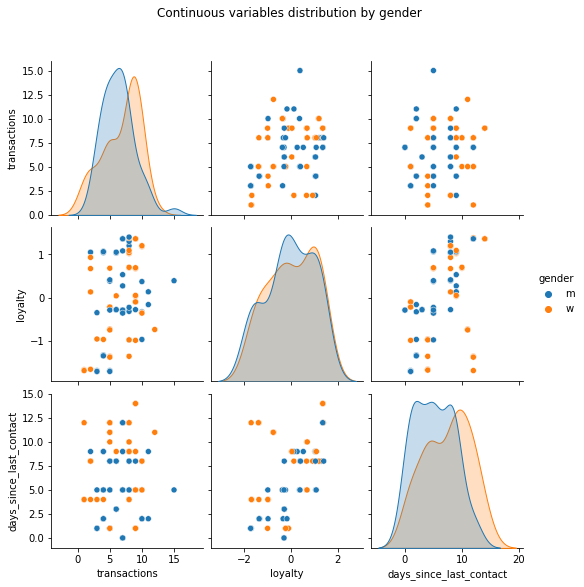

In [5]:
# Visualize distributions by gender

ax = sns.pairplot(df_t[['transactions', 'loyalty', 'days_since_last_contact', 'gender']], hue='gender')
ax.fig.suptitle("Continuous variables distribution by gender", y=1.08)
plt.show()

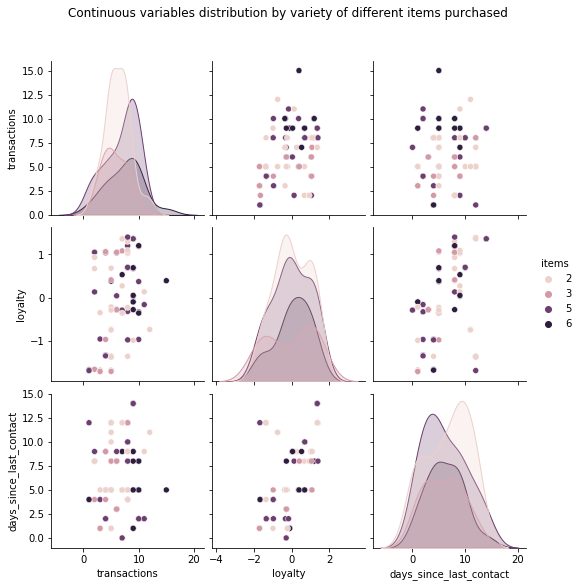

In [6]:
# Visualize distributions by variety of different items purchased

ax = sns.pairplot(df_t[['transactions', 'loyalty', 'days_since_last_contact', 'items']], hue='items')
ax.fig.suptitle('Continuous variables distribution by variety of different items purchased', y=1.08)
plt.show()

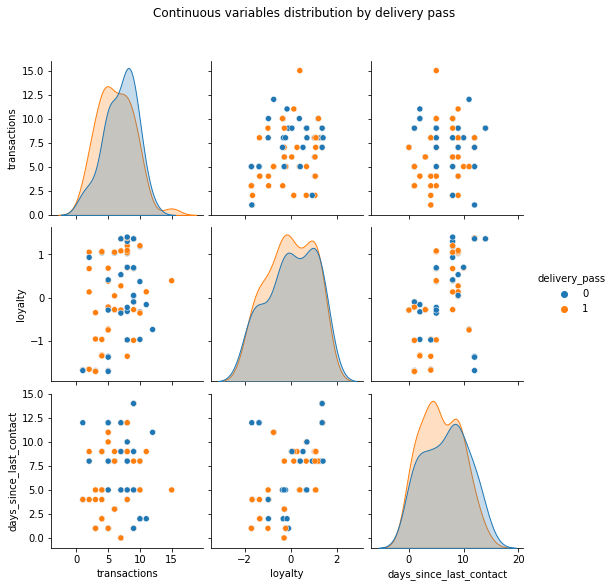

In [7]:
# Visualize distributions by delivery pass

ax = sns.pairplot(df_t[['transactions', 'loyalty', 'days_since_last_contact', 'delivery_pass']], hue='delivery_pass')
ax.fig.suptitle("Continuous variables distribution by delivery pass", y=1.08)
plt.show()

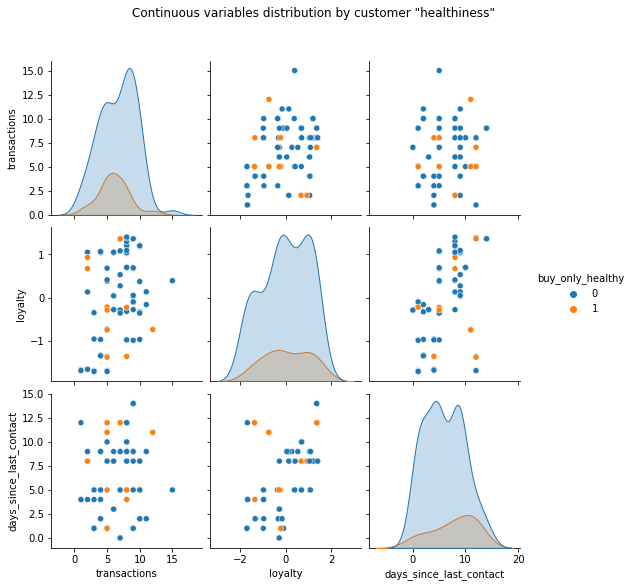

In [8]:
# Visualize distributions by customer "healthiness"

ax = sns.pairplot(df_t[['transactions', 'loyalty', 'days_since_last_contact', 'buy_only_healthy']], hue='buy_only_healthy')
ax.fig.suptitle('Continuous variables distribution by customer "healthiness"', y=1.08)
plt.show()

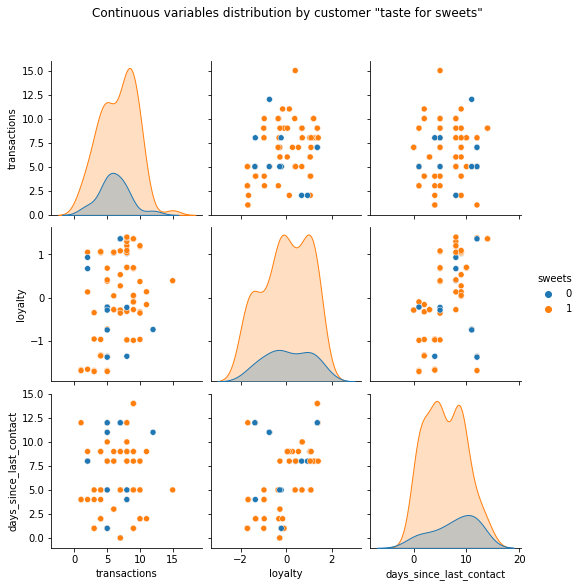

In [9]:
# Visualize distributions by customer "taste for sweet"

ax = sns.pairplot(df_t[['transactions', 'loyalty', 'days_since_last_contact', 'sweets']], hue='sweets')
ax.fig.suptitle('Continuous variables distribution by customer "taste for sweets"', y=1.08)
plt.show()

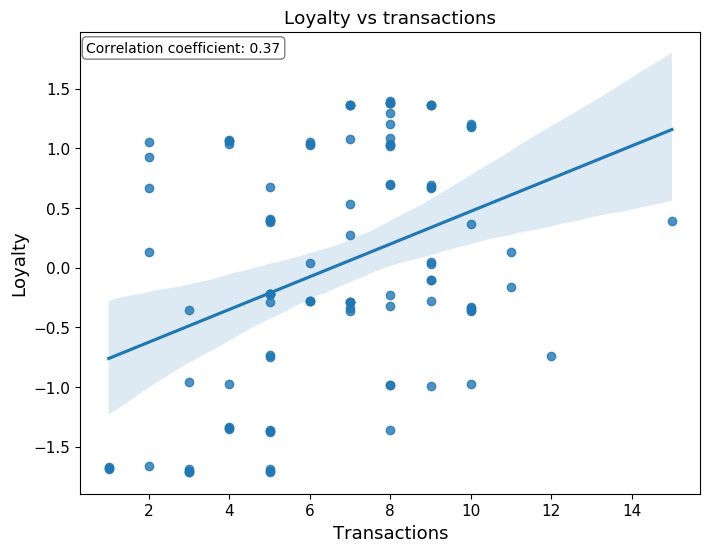

In [10]:
## Scatter plot Loyalty vs transactions

# Set font of the chart and figure size
plt.style.use('default')#set style
plt.rcParams["font.size"] = 11 # set default font size

fig, ax = plt.subplots(1, figsize=(8,6))

# Scatter
ax = sns.regplot(x=df_t['transactions'], y=df_t['loyalty'], ax=ax)


# Text box on the left corner
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
ax.text(0.01, 0.98, 'Correlation coefficient: {}'.format(str(round(df_t['transactions'].corr(df_t['loyalty'], method='pearson'), 2))), transform=ax.transAxes, fontsize=10, fontweight="normal", verticalalignment='top', bbox=props, linespacing=1.5)
     
# Details
plt.title('Loyalty vs transactions')
plt.ylabel('Loyalty', fontweight='light', fontsize=13)
plt.xlabel('Transactions', fontweight='light', fontsize=13)

plt.show()

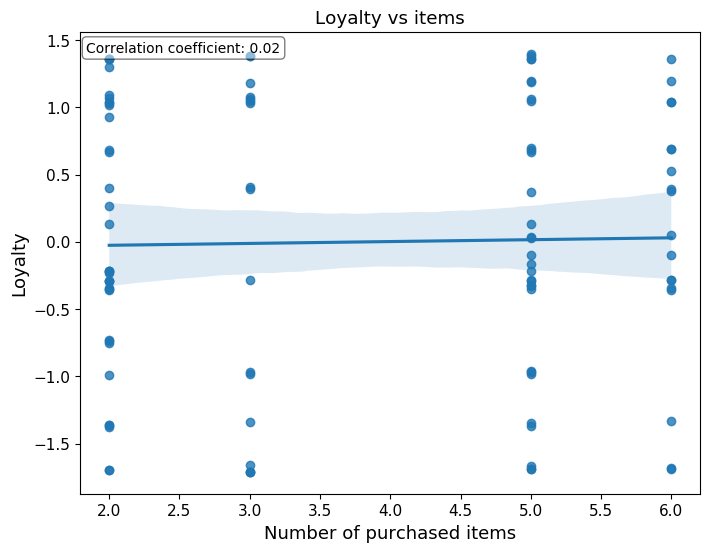

In [11]:
## Scatter plot Loyalty vs items

# Set font of the chart and figure size
plt.style.use('default')#set style
plt.rcParams["font.size"] = 11 # set default font size

fig, ax = plt.subplots(1, figsize=(8,6))

# Scatter
ax = sns.regplot(x=df_t['items'], y=df_t['loyalty'], ax=ax)


# Text box on the left corner
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
ax.text(0.01, 0.98, 'Correlation coefficient: {}'.format(str(round(df_t['items'].corr(df_t['loyalty'], method='pearson'), 2))), transform=ax.transAxes, fontsize=10, fontweight="normal", verticalalignment='top', bbox=props, linespacing=1.5)
     
# Details
plt.title('Loyalty vs items')
plt.ylabel('Loyalty', fontweight='light', fontsize=13)
plt.xlabel('Number of purchased items', fontweight='light', fontsize=13)

plt.show()

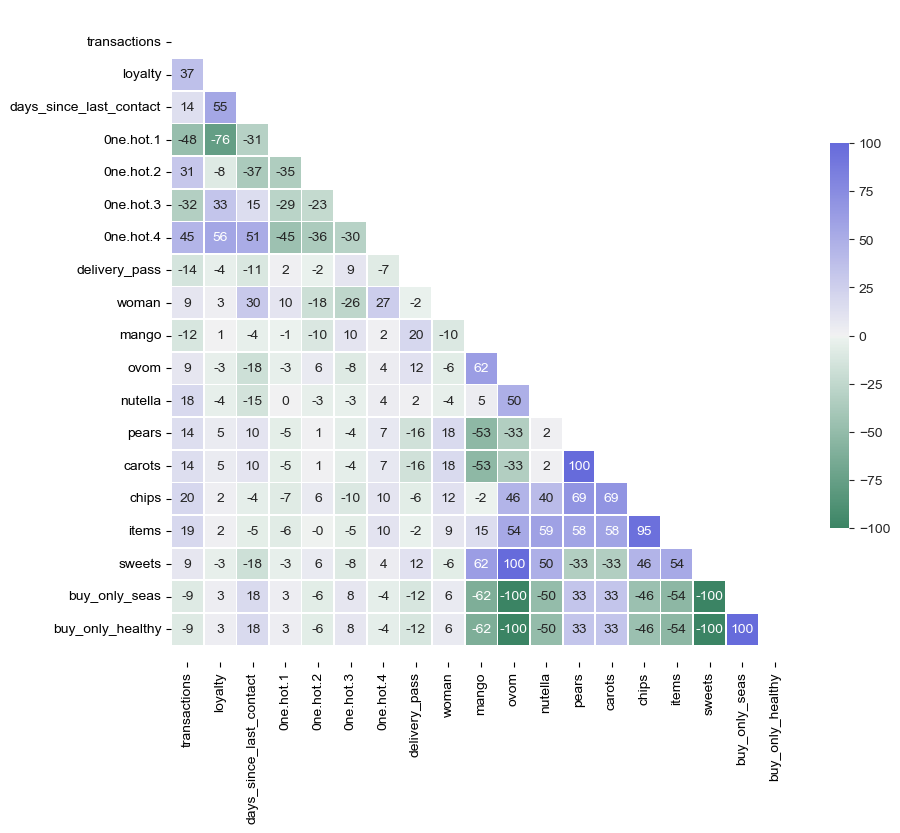

In [12]:
## Correlation matrix for numeric variables

plt.style.use('default')#set style
plt.rcParams["font.size"] = 10 # set default font size

f, ax = plt.subplots(1, figsize=(10, 10))
cmap = sns.diverging_palette(150, 265, as_cmap=True)
sns.set_style(style = 'white')

mask = np.triu(np.ones_like(df_t[numeric].corr(), dtype=np.bool))

sns.heatmap(100*df_t[numeric].corr(), cmap=cmap, mask=mask, square=True, annot=True, fmt='.0f', linewidths=.5, cbar_kws={"shrink": .5}, ax=ax);
plt.yticks(rotation=0)
#plt.xticks(rotation=0)

ax.set_ylim((19+0.5, -0.5))
plt.show()

## 2) Segmentation model
- Task: Describe a model you would choose to provide a website personalization/segmentation solution. Define your own goal for this personalization.

In this section, I decided to segment customers using a k-means model with the k-clusters chosen via the elbow method. The performance of the model is assessed looking at the sum of squared error (SSE).

I decide to segment customers based on their loyalty and frequency of purchases. This allows me to obtain 4 neat customer segments with an SSE close to 50. The inclusion of other variables such as purchase's recency, gender, etc., produces clusters which are more dispersed (i.e., higher SSE) and more difficult to interpret.

In [13]:
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
from sklearn.cluster import KMeans
from sklearn import metrics

In [14]:
# Data normalization for k-means
sc = StandardScaler()

# Define matrix
X = df_t[['transactions', 'loyalty']].values

# Apply normalization
X_stand = sc.fit_transform(X)

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 32.90it/s]


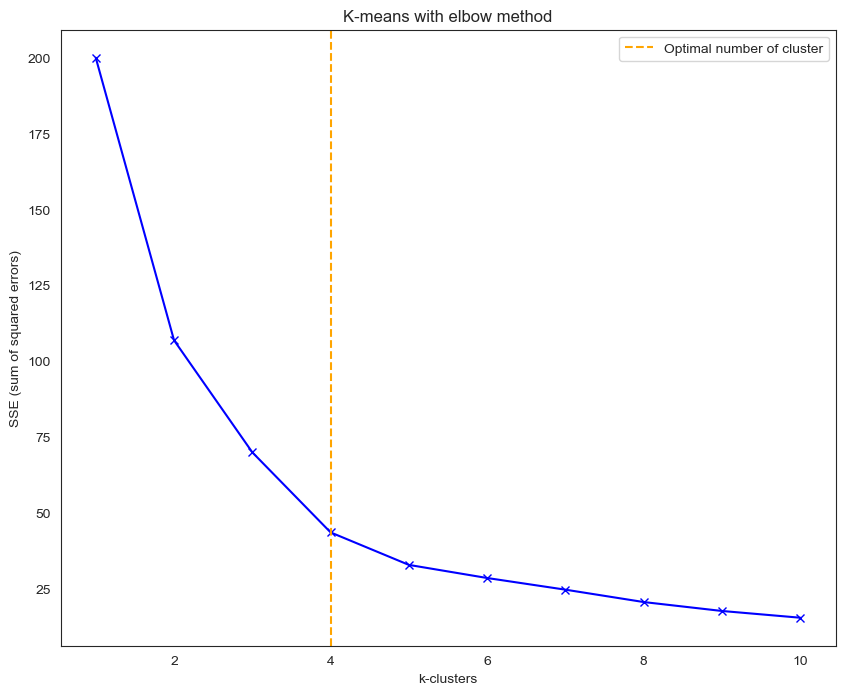

In [15]:
# Range of clusters to optimize
K = range(1, 11)

# Loop model
SSE_k = [] # SSE values

for k in tqdm(K):
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k, random_state=50)
    kmeanModel.fit(X_stand)
    # Append SSE
    SSE_k.append(kmeanModel.inertia_)


# Plot SSE vs number of clusters
plt.figure(figsize=(10, 8))
plt.plot(K, SSE_k, 'bx-')
plt.axvline(x=4, color='orange', label='Optimal number of cluster', linestyle='--')
plt.legend()
plt.xlabel('k-clusters')
plt.ylabel('SSE (sum of squared errors)')
plt.title('K-means with elbow method')
plt.show()

In [16]:
# Run optimal k-means
model = KMeans(n_clusters=4, random_state=50)
model.fit(X_stand)

# Define cluster variable in df
df_t["cluster"] = model.labels_

print('Number of customers per cluster:', '\n' , df_t["cluster"].value_counts())

Number of customers per cluster: 
 0    30
2    26
3    23
1    21
Name: cluster, dtype: int64


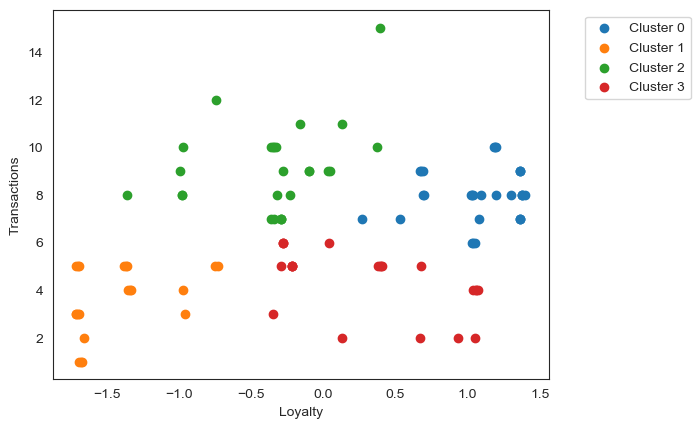

,transactions,loyalty,days_since_last_contact,0ne.hot.1,0ne.hot.2,0ne.hot.3,0ne.hot.4,delivery_pass,is_newsletter,woman,mango,ovom,nutella,pears,carots,chips,items,sweets,buy_only_seas,buy_only_healthy
cluster,,,,,,,,,,,,,,,,,,,,
1,3.62,-1.44,4.90,1.00,0.00,0.00,0.00,0.57,True,0.52,0.71,0.86,0.57,0.57,0.57,0.43,3.71,0.86,0.14,0.14
2,9.15,-0.35,4.35,0.12,0.65,0.04,0.19,0.46,True,0.42,0.54,0.85,0.58,0.77,0.77,0.62,4.12,0.85,0.15,0.15
3,4.39,0.30,5.74,0.26,0.09,0.48,0.17,0.65,True,0.39,0.61,0.74,0.43,0.65,0.65,0.39,3.48,0.74,0.26,0.26
0,8.00,1.08,9.33,0.00,0.10,0.13,0.77,0.43,True,0.60,0.70,0.83,0.53,0.67,0.67,0.50,3.90,0.83,0.17,0.17


In [17]:
# Plot clusters
for c in np.arange(4):
    # Get points in this cluster
    idx = (model.labels_ == c)
    
    # Plot points
    plt.scatter(X[idx, 1], X[idx, 0], label='Cluster {}'.format(c)) # First column: loyalty; Second column: transactions

# Add legend and labels
plt.legend(bbox_to_anchor=(1.3, 1), loc='upper right')
plt.ylabel('Transactions')
plt.xlabel('Loyalty')
plt.show()


# Characteristics of customer segments
display(df_t.groupby('cluster').mean().round(2).sort_values('loyalty'))

Based on the results of the k-means the clusters can be interpreted as:
- Cluster 1 "Low loyalty, few transactions": Snack-buyers. They buy on average every 5 days, mostly sweets/snacks and usually don't buy healthy or seasonal food often.
- Cluster 2 "Low-mid loyalty, many transactions": Frequent, diversified-basket buyers: mostly men, they shop every 4 days, they have a diversified basket of goods, with chocolate still as the most common item. 
- Cluster 3 "High loyalty, few transactions": Loyal, picky healthy buyers. They are mostly men, they tend to buy few different items every 6 days and more than a querter of them buys only vegetables/fruits.
- Cluster 0 "High loyalty, many transactions": Loyal, unfrequent, diversified-basket buyers. Mostly women, they shop every 9 days, they have a diversified basket of goods, with chocolate still as the most common item. 

The cluster 1 "Low loyalty, few transactions" could be a good target for a marketing campaign to increase the number of their transactions. They are almost equally split between men and women, they tend to buy few items every 5 days like sweets and mango. They could be targeted with recommendations/offers on sweets/snacks & mango but no vegetables/other fruits. 

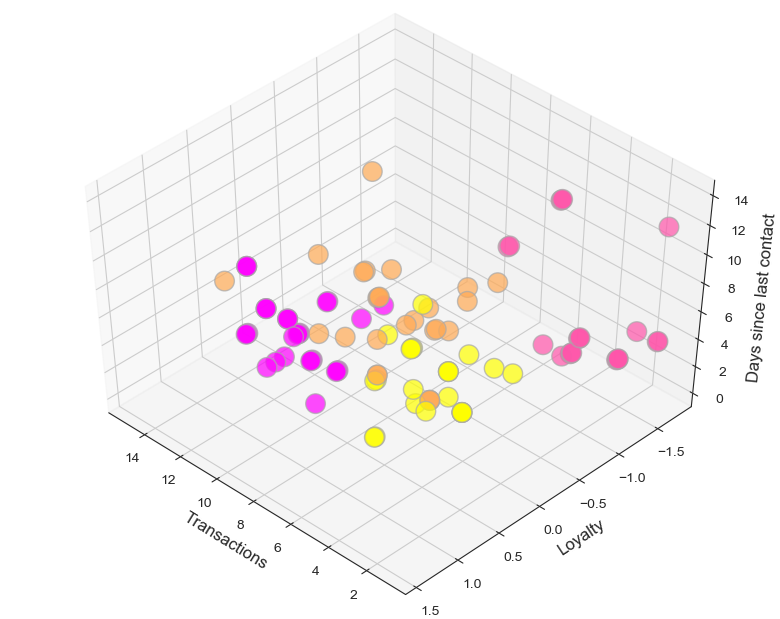

,transactions,loyalty,days_since_last_contact,0ne.hot.1,0ne.hot.2,0ne.hot.3,0ne.hot.4,delivery_pass,is_newsletter,woman,mango,ovom,nutella,pears,carots,chips,items,sweets,buy_only_seas,buy_only_healthy
cluster,,,,,,,,,,,,,,,,,,,,
1,3.62,-1.44,4.90,1.00,0.00,0.00,0.00,0.57,True,0.52,0.71,0.86,0.57,0.57,0.57,0.43,3.71,0.86,0.14,0.14
2,9.15,-0.35,4.35,0.12,0.65,0.04,0.19,0.46,True,0.42,0.54,0.85,0.58,0.77,0.77,0.62,4.12,0.85,0.15,0.15
3,4.39,0.30,5.74,0.26,0.09,0.48,0.17,0.65,True,0.39,0.61,0.74,0.43,0.65,0.65,0.39,3.48,0.74,0.26,0.26
0,8.00,1.08,9.33,0.00,0.10,0.13,0.77,0.43,True,0.60,0.70,0.83,0.53,0.67,0.67,0.50,3.90,0.83,0.17,0.17


In [18]:
# Clusters in 3d space transactions-loyalty-days since last contact

from mpl_toolkits.mplot3d import Axes3D # 3d plot

fig = plt.figure(1, figsize=(8, 6))
plt.clf()

ax = Axes3D(fig, 
            rect = [0, 0, .95, 1], 
            elev = 48, 
            azim = 134)

plt.cla()
ax.scatter(df_t['transactions'], df_t['loyalty'], df_t['days_since_last_contact'], 
           c = df_t['cluster'], 
           s = 200, 
           cmap = 'spring', 
           alpha = 0.7, 
           edgecolor = 'darkgrey')
ax.set_xlabel('Transactions', 
              fontsize = 12)
ax.set_ylabel('Loyalty', 
              fontsize = 12)
ax.set_zlabel('Days since last contact', 
              fontsize = 12)

#plt.savefig('3d_plot.png')
plt.show()

# Characteristics of customer segments
display(df_t.groupby('cluster').mean().round(2).sort_values('loyalty'))

## 3) Deployment
- Task: Describe at least one way of how to deploy your solution in terms of software architecture. You can make assumptions on how you would store, update the data and provide the model output for developers to use it.

Limitations of this segmentation model: it is based on few data and lacks information of the monetary value of purchases.

I would train the model on Python script, export the scikit-learn pipeline in a Pickle file (.pkl), upload the model on a Cloud Storage bucket, test the model with local predicitons. After that, I would create a model resource on AI Platform Prediction, create a version of the model, and link this version to the model file stored on Cloud Storage. The model-resource can then be updated via the Deployment Resource Manager.

I would test the efficacy of the model via A/B testing. I would provide the recommendations of snacks/mango randomly to half of the cluster 1 type of customers and check whether average number of transactions are statistically different between the two groups, with the group exposed to the customized recommendations showing an higher, statistically significant, number of transactions.


